In [129]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 


In [130]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')

In [131]:
train.shape

(10714, 28)

In [132]:
test.shape

(14498, 27)

In [133]:
train.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.000,Farmer,Public,2,...,93.000,233.000,82.000,58.000,27,7,3600000.000,1300000,2.000,49.135
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.000,Farmer,Walk,2,...,56.000,328.000,89.000,68.000,5,6,1600000.000,400000,1.000,51.148
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.000,Cleaner,Public,2,...,137.000,213.000,77.000,43.000,40,6,3400000.000,900000,1.000,73.224
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.000,Driver,Car,2,...,167.000,275.000,64.000,60.000,27,7,700000.000,2300000,1.000,48.779
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.000,Manufacturing,Car,2,...,153.000,331.000,71.000,64.000,32,7,3200000.000,1100000,1.000,87.869


In [134]:
train

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.000,Farmer,Public,2,...,93.000,233.000,82.000,58.000,27,7,3600000.000,1300000,2.000,49.135
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.000,Farmer,Walk,2,...,56.000,328.000,89.000,68.000,5,6,1600000.000,400000,1.000,51.148
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.000,Cleaner,Public,2,...,137.000,213.000,77.000,43.000,40,6,3400000.000,900000,1.000,73.224
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.000,Driver,Car,2,...,167.000,275.000,64.000,60.000,27,7,700000.000,2300000,1.000,48.779
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.000,Manufacturing,Car,2,...,153.000,331.000,71.000,64.000,32,7,3200000.000,1100000,1.000,87.869
5,6,Bhubaneshwar,Female,Mrs,sandhya,YES,1.000,Clerk,Public,2,...,86.000,216.000,94.000,38.000,5,5,4600000.000,1900000,2.000,49.518
6,7,Bhubaneshwar,Female,Mrs,iqra,YES,2.000,Manufacturing,Car,2,...,156.000,311.000,99.000,68.000,23,5,4000000.000,1600000,1.000,49.670
7,8,Bhubaneshwar,Female,Mrs,renu @ rinki,YES,1.000,Manufacturing,Public,2,...,179.000,242.000,82.000,59.000,34,3,4100000.000,1200000,0.000,49.121
8,9,Bhubaneshwar,Female,Mrs,kalyani patro,YES,2.000,Sales,Public,2,...,156.000,nan,nan,37.000,21,7,4500000.000,900000,0.000,48.532
9,10,Bhubaneshwar,Female,Mrs,gurdeep kaur,YES,1.000,Farmer,Public,2,...,178.000,277.000,83.000,58.000,28,4,2200000.000,1400000,2.000,48.475


In [135]:
test.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,5942,Delhi,Female,Mrs,smt rekha prajapat,YES,2,Driver,Public,4,...,153,196,240,85,53,17,3,3900000,1300000,1
1,18664,Delhi,Male,Mr,nirmal,YES,2,Legal,Walk,4,...,95,138,241,81,61,2,5,1800000,1300000,1
2,5603,Delhi,Female,Mrs,pinky,YES,2,Sales,Car,4,...,40,166,236,88,47,24,3,5000000,2000000,2
3,5649,Delhi,Female,Mrs,pooja @aafrin,YES,2,Sales,Car,4,...,78,83,211,87,52,13,6,3100000,600000,2
4,5099,Delhi,Female,Mrs,anjali,YES,2,Business,Car,4,...,109,207,312,94,68,39,5,2300000,1500000,1


1. people_ID, Designation, Name is not going help us in the prediction so we can just remove those columns 
2. Married, Children, Ocupation, Mode_transport etc.. may or may not help us in the prediction so we will examin it later 

In [136]:
train_ID = train['people_ID']
test_ID = test['people_ID']
train.drop("people_ID", axis = 1, inplace = True)
test.drop("people_ID", axis = 1, inplace = True)
train.drop("Designation", axis = 1, inplace = True)
test.drop("Designation", axis = 1, inplace = True)
train.drop("Name", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)

In [137]:
test.shape

(14498, 24)


 mu = 52.28 and sigma = 10.67



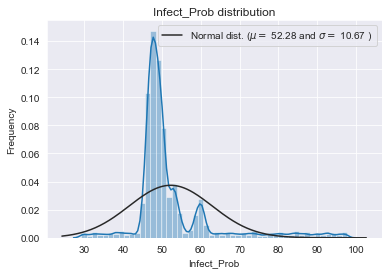

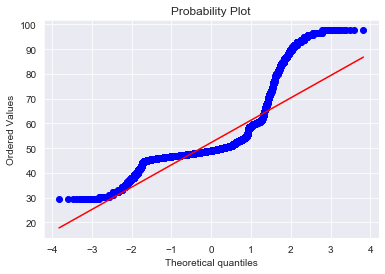

In [138]:
sns.distplot(train['Infect_Prob'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Infect_Prob'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Infect_Prob distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Infect_Prob'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) modelsworks well with normally distributed data , we need to transform this variable and make it more normally distributed


 mu = 3.96 and sigma = 0.17



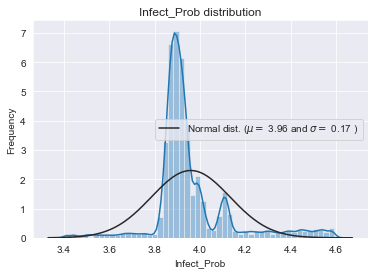

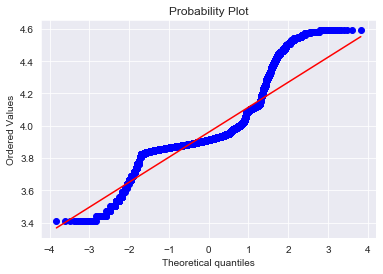

In [139]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["Infect_Prob"] = np.log1p(train["Infect_Prob"])

#Check the new distribution 
sns.distplot(train['Infect_Prob'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Infect_Prob'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Infect_Prob distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Infect_Prob'], plot=plt)
plt.show()

still the skew is not correct but its better

In [140]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Infect_Prob.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Infect_Prob'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (25212, 24)


/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [141]:
all_data

,Age,Blood Glucose,Charlson Index,Children,Coma score,Deaths/1M,Diuresis,FT/month,Gender,HBB,...,Mode_transport,Occupation,Platelets,Pulmonary score,Region,cardiological pressure,cases/1M,comorbidity,d-dimer,salary
0,68,7,27,1.000,8,0,441.000,2.000,Female,93.000,...,Public,Farmer,154.000,<400,Bhubaneshwar,Normal,2,Hypertension,233.000,1300000
1,64,6,5,2.000,15,0,nan,1.000,Female,56.000,...,Walk,Farmer,121.000,<100,Bhubaneshwar,Stage-02,2,Diabetes,328.000,400000
2,19,6,40,1.000,13,0,416.000,1.000,Female,137.000,...,Public,Cleaner,124.000,<300,Bhubaneshwar,Elevated,2,None,213.000,900000
3,33,7,27,1.000,9,0,410.000,1.000,Female,167.000,...,Car,Driver,98.000,<200,Bhubaneshwar,Stage-01,2,Coronary Heart Disease,275.000,2300000
4,23,7,32,2.000,7,0,390.000,1.000,Female,153.000,...,Car,Manufacturing,21.000,<400,Bhubaneshwar,Normal,2,Diabetes,331.000,1100000
5,35,5,5,1.000,9,0,389.000,2.000,Female,86.000,...,Public,Clerk,139.000,<100,Bhubaneshwar,Stage-02,2,None,216.000,1900000
6,61,5,23,2.000,3,0,nan,1.000,Female,156.000,...,Car,Manufacturing,75.000,<400,Bhubaneshwar,Normal,2,Coronary Heart Disease,311.000,1600000
7,49,3,34,1.000,10,0,194.000,0.000,Female,179.000,...,Public,Manufacturing,123.000,<200,Bhubaneshwar,Stage-01,2,Diabetes,242.000,1200000
8,44,7,21,2.000,6,0,310.000,0.000,Female,156.000,...,Public,Sales,nan,<200,Bhubaneshwar,Stage-01,2,Hypertension,nan,900000
9,41,4,28,1.000,14,0,242.000,2.000,Female,178.000,...,Public,Farmer,23.000,<300,Bhubaneshwar,Elevated,2,None,277.000,1400000


## missing data in train set

In [142]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
d-dimer,4.419
Heart rate,4.419
Insurance,4.323
Platelets,3.665
Occupation,2.963
FT/month,2.868
Diuresis,2.840
Children,1.234
comorbidity,0.896
cardiological pressure,0.385


## missing data in test set

In [143]:
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :test_na})
missing_data.head(20)

,Missing Ratio


## test set have no missing values 

Text(0.5, 1.0, 'Percent missing data by feature')

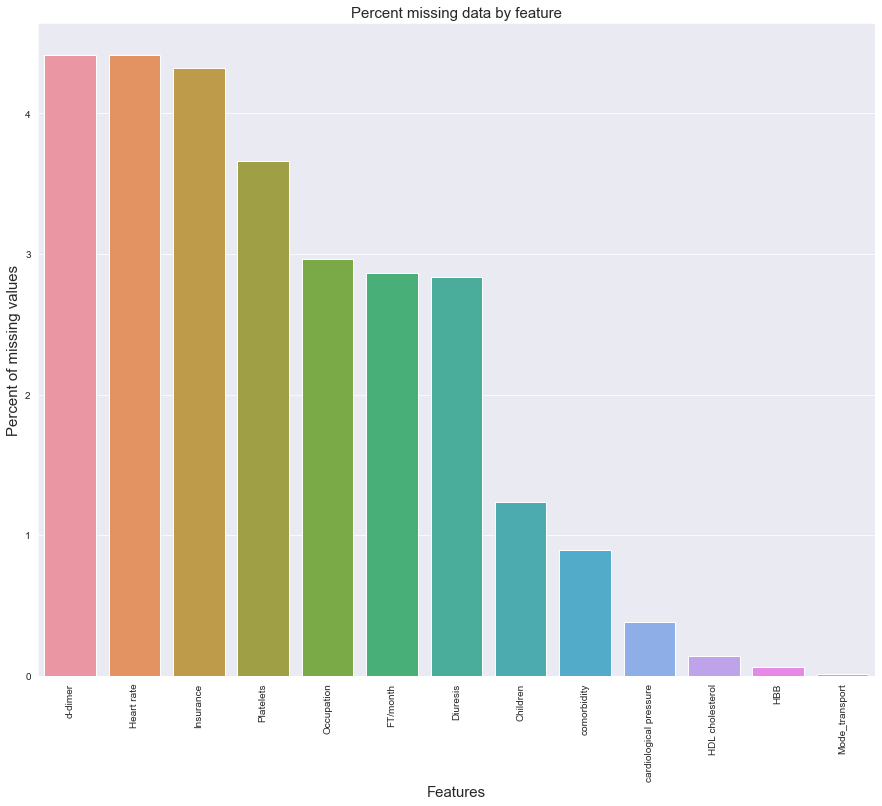

In [144]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [145]:
all_data['Heart rate'].fillna((all_data['Heart rate'].mean()), inplace=True)

In [146]:
all_data['d-dimer'].fillna((all_data['d-dimer'].mean()), inplace=True)

In [147]:
all_data['Insurance'].fillna((all_data['Insurance'].mean()), inplace=True)

In [148]:
all_data['Platelets'].fillna((all_data['Platelets'].mean()), inplace=True)

In [149]:
all_data['Occupation'].fillna((all_data['Occupation'].mode()[0]), inplace=True)

In [150]:
all_data['FT/month'].fillna((all_data['FT/month'].mode()[0]), inplace=True)

In [151]:
all_data['Diuresis'].fillna((all_data['Diuresis'].mean()), inplace=True)

In [152]:
all_data['Children'].fillna((all_data['Children'].mode()[0]), inplace=True)

In [153]:
all_data['comorbidity'].fillna(("None"), inplace=True) 

In [154]:
all_data['cardiological pressure'].fillna(("Normal"), inplace=True) 

In [155]:
all_data['HDL cholesterol'].fillna((all_data['HDL cholesterol'].mean()), inplace=True)

In [156]:
all_data['HBB'].fillna((all_data['HBB'].mean()), inplace=True)

In [157]:
all_data['Mode_transport'].fillna((all_data['Mode_transport'].mode()[0]), inplace=True)

In [158]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [159]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],prefix=feature_to_encode).iloc[:,1:]
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [160]:
columns = ('Region','Gender','Married','Occupation','Mode_transport','comorbidity','cardiological pressure','Pulmonary score')

In [161]:
for i in columns:
    all_data = encode_and_bind(all_data, i)
    

In [162]:
all_data.head()

,Age,Blood Glucose,Charlson Index,Children,Coma score,Deaths/1M,Diuresis,FT/month,HBB,HDL cholesterol,...,Mode_transport_Walk,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02,Pulmonary score_<200,Pulmonary score_<300,Pulmonary score_<400
0,68,7,27,1.000,8,0,441.000,2.000,93.000,58.000,...,0,0,1,0,1,0,0,0,0,1
1,64,6,5,2.000,15,0,279.902,1.000,56.000,68.000,...,1,1,0,0,0,0,1,0,0,0
2,19,6,40,1.000,13,0,416.000,1.000,137.000,43.000,...,0,0,0,1,0,0,0,0,1,0
3,33,7,27,1.000,9,0,410.000,1.000,167.000,60.000,...,0,0,0,0,0,1,0,1,0,0
4,23,7,32,2.000,7,0,390.000,1.000,153.000,64.000,...,0,1,0,0,1,0,0,0,0,1


In [163]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [164]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [165]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [166]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [167]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [168]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [169]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [170]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [171]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [172]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1513 (0.0068)



In [173]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1513 (0.0068)



In [174]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. 

Kernel Ridge score: 0.5737 (0.0195)



In [175]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1557 (0.0046)



In [176]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1551 (0.0036)



In [177]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1477 (0.0054)



In [178]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [179]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. 

 Averaged base models score: 0.2041 (0.0054)



In [180]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [181]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. 

Stacking Averaged models score: 0.1488 (0.0058)


In [182]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [183]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. 

0.12483088336359367


In [189]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in train.columns.values]
test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in test.columns.values]

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.10414919418266916


In [190]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.1319187197445172


In [191]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.12183306617635896


In [192]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [193]:
sub = pd.DataFrame()
sub['people_ID'] = test_ID
sub['Infect_Prob'] = ensemble
sub.to_csv('submission.csv',index=False)